<a href="https://colab.research.google.com/github/fernandopaz1/Ciencia-de-Datos/blob/main/datosCovid_FrontendCafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import pandas as pd

In [80]:
import numpy as np
import matplotlib.pyplot as plt


In [81]:
filename = '/content/drive/My Drive/DatosFrontendCafe/casos_covid19.csv' 
datos = pd.read_table(filename, sep=',')  # leyendo datos

# Tip del día: ver bien cual es el separador 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [82]:
df = pd.DataFrame(datos)   # Poniendolos en un dataframe

In [83]:
print(df)

         numero_de_caso  ...     tipo_contagio
0               2775791  ...  En Investigación
1               2775982  ...       Comunitario
2               2779533  ...       Comunitario
3               2779701  ...       Comunitario
4               2780180  ...       Comunitario
...                 ...  ...               ...
2528922         2446868  ...          Contacto
2528923         2448949  ...       Comunitario
2528924         2449546  ...       Comunitario
2528925         2450555  ...  En Investigación
2528926         2454097  ...       Comunitario

[2528927 rows x 14 columns]


In [84]:
print(f'Columnas: {list(df.columns)}')
print(f'Tamaño del dataframe {df.shape}')

Columnas: ['numero_de_caso', 'fecha_apertura_snvs', 'fecha_toma_muestra', 'fecha_clasificacion', 'provincia', 'barrio', 'comuna', 'genero', 'edad', 'clasificacion', 'fecha_fallecimiento', 'fallecido', 'fecha_alta', 'tipo_contagio']
Tamaño del dataframe (2528927, 14)


In [85]:
df.loc[0:2]  # Listando los primeros 3 elementos

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,2775791,21SEP2020:00:00:00.000000,21SEP2020:00:00:00.000000,22SEP2020:00:00:00.000000,CABA,BARRACAS,4.0,masculino,49.0,confirmado,NaN,NaN,29SEP2020:00:00:00.000000,En Investigación
1,2775982,21SEP2020:00:00:00.000000,21SEP2020:00:00:00.000000,21SEP2020:00:00:00.000000,CABA,FLORES,7.0,femenino,28.0,confirmado,NaN,NaN,29SEP2020:00:00:00.000000,Comunitario
2,2779533,21SEP2020:00:00:00.000000,21SEP2020:00:00:00.000000,21SEP2020:00:00:00.000000,Buenos Aires,NaN,NaN,femenino,70.0,confirmado,NaN,NaN,29SEP2020:00:00:00.000000,Comunitario


In [86]:
pd.to_datetime('21SEP2020', format='%d%b%Y')


Timestamp('2020-09-21 00:00:00')

In [87]:
df.fecha_apertura_snvs = pd.to_datetime(df.fecha_apertura_snvs, format='%d%b%Y:%H:%M:%S.%f') # Muy importante pegarle a todo el formato de la fecha
df.fecha_toma_muestra = pd.to_datetime(df.fecha_toma_muestra, format='%d%b%Y:%H:%M:%S.%f')   # Ver si se puede hacer en menos lineas
df.fecha_alta = pd.to_datetime(df.fecha_alta, format='%d%b%Y:%H:%M:%S.%f')
df.fecha_clasificacion = pd.to_datetime(df.fecha_clasificacion, format='%d%b%Y:%H:%M:%S.%f')
df.fecha_fallecimiento = pd.to_datetime(df.fecha_fallecimiento, format='%d%b%Y:%H:%M:%S.%f')


In [127]:
# Para ver en que rango cubre este dataset
print(df.fecha_toma_muestra.min())   # guarda 1974?
print(df.fecha_toma_muestra.max())

# Probando si  compara fechas
print(df.fecha_toma_muestra.min() > df.fecha_toma_muestra.max()) 



1974-11-09 00:00:00
2021-05-27 00:00:00
False


In [88]:
df.fecha_fallecimiento   # los NaN los transforma a NaT

0         NaT
1         NaT
2         NaT
3         NaT
4         NaT
           ..
2528922   NaT
2528923   NaT
2528924   NaT
2528925   NaT
2528926   NaT
Name: fecha_fallecimiento, Length: 2528927, dtype: datetime64[ns]

In [122]:
print(f'Los tipos de contagio son {df.tipo_contagio.unique()}')
df.groupby('tipo_contagio').fallecido.count()  # duda

Los tipos de contagio son ['En Investigación' 'Comunitario' 'Contacto' 'Trabajador de la Salud' nan
 'Importado']


tipo_contagio
Comunitario               8719
Contacto                  1848
En Investigación          1700
Importado                   13
Trabajador de la Salud      91
Name: fallecido, dtype: int64

In [120]:
print(f'Los genero {df.genero.unique()}')
df.groupby('genero').fallecido.count() 
# agrupo el dataframe por los que tienen mismo genero
# me fijo en la columna de fallecidos
 # nunique cuenta solo los que no son unicos

Los genero ['masculino' 'femenino' nan]


genero
femenino     6530
masculino    8213
Name: fallecido, dtype: int64

In [144]:
df.comuna.max()

15.0

AxesSubplot(0.125,0.125;0.775x0.755)


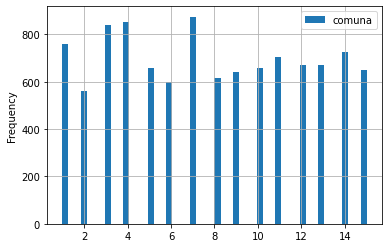

In [157]:
df_caba = df.dropna(subset=['comuna','fallecido'])

histograma = df_caba.filter(items= ['comuna', 'fallecido'],).plot.hist(bins=50)
print(histograma)
plt.grid()
plt.show()